# Demographics Comparison

In [1]:
# Dependencies
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

In [2]:
# Read Census data and health/fast food restaurant data
all_data = pd.read_csv("data/census_health_ff_2011_2016.csv")
all_data.head()

,County,Household Income 2011,Population 2011,Median Age 2011,Per Capita Income 2011,Poverty Count 2011,Employed Persons Over 16 2011,Unemployed Persons Over 16 2011,Household Income 2016,Population 2016,...,"Fast-food restaurants, 2016","Fast-food restaurants (% change), 2011-16","Fast-food restaurants/10,000 pop, 2011","Fast-food restaurants/10,000 pop, 2016","Fast-food restaurants/1,000 pop (% change), 2011-16",Obesity 2011 %,Obesity 2016 %,New Diabetes per 1k : 2011,New Diabetes per 1k : 2016,Diagnosed Diabetes 2011 %
0,Alameda,70821.0,1494876.0,36.4,34937.0,173156.0,792734.0,401593.0,79831.0,1605217.0,...,1293,18.623853,7.11388,7.82102,9.940291,20.2,19.2,7.3,5.6,6.7
1,Alpine,59018.0,1167.0,40.4,29576.0,170.0,581.0,351.0,62375.0,1184.0,...,0,-100.000000,18.29826,0.00000,-100.000000,22.6,20.9,8.4,4.1,4.6
2,Amador,56180.0,38244.0,48.0,28030.0,3372.0,15650.0,17192.0,57032.0,36963.0,...,21,75.000000,3.19668,5.60403,75.308222,24.8,29.8,8.3,10.1,10.4
3,Butte,42971.0,219309.0,37.2,23431.0,42283.0,101633.0,77585.0,44366.0,223877.0,...,158,7.482993,6.68173,6.97495,4.388394,24.2,27.2,9.0,8.0,8.7
4,Calaveras,55256.0,45794.0,49.0,28667.0,3751.0,20270.0,17987.0,53502.0,44787.0,...,30,15.384615,5.75692,6.62032,14.997581,23.9,30.4,7.6,7.9,8.3


In [11]:
# Reduce data to age vs. fast food restaurants
age_fastfood = pd.DataFrame(all_data[["County", "Median Age 2011", "Median Age 2016", "Fast-food restaurants/10,000 pop, 2011", "Fast-food restaurants/10,000 pop, 2016"]])

# Remove Alpine and Mono counties as outliers
age_fastfood = age_fastfood.loc[(age_fastfood["County"] != "Alpine") & (age_fastfood["County"] != "Mono"),:]
age_fastfood.count()


County                                    56
Median Age 2011                           56
Median Age 2016                           56
Fast-food restaurants/10,000 pop, 2011    56
Fast-food restaurants/10,000 pop, 2016    56
dtype: int64

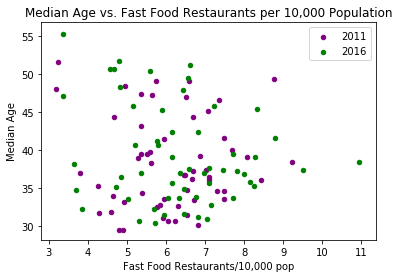

In [28]:
# Plot scatter chart comparing median age to fast food restaurants, plotting both years on the same chart

ax1 = age_fastfood.plot(x="Fast-food restaurants/10,000 pop, 2011", y="Median Age 2011", kind="scatter", color="purple", label="2011", title="Median Age vs. Fast Food Restaurants per 10,000 Population")
age_fastfood.plot(x="Fast-food restaurants/10,000 pop, 2016", y="Median Age 2016", kind="scatter", color="green", label="2016", ax=ax1)


# Plot labels
ax1.set_xlabel("Fast Food Restaurants/10,000 pop")
ax1.set_ylabel("Median Age")

# Plot the legend
ax1.legend(loc="best")

# Display graph
plt.savefig("Charts/median_age_v_ff_scatter.png")
plt.show()
